<a href="https://colab.research.google.com/github/fbghkh1999/AI/blob/main/phaze4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#تعیین قیمت برای یک محصول 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
% matplotlib inline

In [38]:
divar=pd.read_csv('/content/drive/MyDrive/divar_dataset/divar_posts_dataset.csv')

In [20]:
 divar.head()

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN


In [9]:
divar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947635 entries, 0 to 947634
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       947635 non-null  int64  
 1   archive_by_user  947635 non-null  bool   
 2   brand            190892 non-null  object 
 3   cat1             947635 non-null  object 
 4   cat2             945877 non-null  object 
 5   cat3             775301 non-null  object 
 6   city             947635 non-null  object 
 7   created_at       947635 non-null  object 
 8   desc             947635 non-null  object 
 9   id               947635 non-null  int64  
 10  image_count      947635 non-null  int64  
 11  mileage          120451 non-null  float64
 12  platform         947635 non-null  object 
 13  price            947635 non-null  int64  
 14  title            947635 non-null  object 
 15  type             98529 non-null   object 
 16  year             120451 non-null  obje

In [42]:
from sklearn.model_selection import train_test_split
X=pd.get_dummies(divar[['cat1','cat2','cat3','brand']])
Y=divar['price']
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=44,train_size=0.8,test_size=0.2)

In [39]:
divar=divar[divar['price']!=-1]



In [40]:
divar=divar[divar['cat2']!=np.nan]


In [41]:
divar=divar[divar['brand']!=np.nan]
divar=divar[divar['cat3']!=np.nan]

In [43]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
y_train=sc.fit_transform(np.array(y_train).reshape(-1,1))

In [25]:
np.array(x_train)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred=lr.predict(x_test)

In [12]:
y_pred_new=sc.inverse_transform(y_pred)

In [13]:
from sklearn.metrics import  r2_score
from sklearn.metrics import  mean_squared_error
import math
math.sqrt(mean_squared_error(y_test,y_pred_new))

8466882.307445204

In [14]:
r2_score(y_test,y_pred_new)

0.6836827126084342

In [130]:
y_pred_new

array([[ 468445.82304764],
       [1538086.93365478],
       [3056336.44157791],
       ...,
       [3129578.62889481],
       [1002503.43889999],
       [ 646973.65463257]])

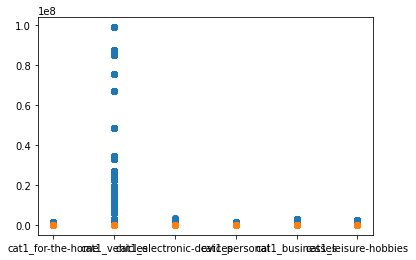

In [132]:
x_test=x_test.idxmax(axis=1)
x_train=x_train.idxmax(axis=1)
plt.scatter(x_test,y_pred_new)
plt.scatter(x_train,y_train)
plt.show()

In [46]:
from sklearn.ensemble import  RandomForestRegressor
rg=RandomForestRegressor(random_state=44,n_estimators=10,max_depth=10)
rg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=44, verbose=0, warm_start=False)

In [47]:
predict=rg.predict(x_test)

In [48]:
predictts=sc.inverse_transform(predict.reshape(-1,1))

In [49]:
predictts

array([[  286982.88671095],
       [ 1177920.74319604],
       [  844995.49729006],
       ...,
       [20136169.17246804],
       [  286982.88671095],
       [   98458.08027312]])

In [50]:
r2_score(y_test,predictts)

0.6640906382975076